In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!pip install python-docx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 3.7 MB/s eta 0:00:00


In [ ]:

import os

# Google Drive'ı mount ettikten sonra
from google.colab import drive
drive.mount('/content/drive')

# Word dosyalarının bulunduğu dizin
directory_path = '/content/drive/My Drive/resumes'

# Dizindeki tüm Word dosyalarını listele
docx_files = [f for f in os.listdir(directory_path) if f.endswith('.docx')]
print(docx_files)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Drakshajavauidev(1).docx', 'Kashyap K. Vora resume(1).docx', 'Balaji Gopalakrishnan Project Manager(1).docx', 'Adhi Gopalam - SM.docx', 'Ami Jape.docx', 'Jayadattaperi N.docx', 'Dave.docx', 'Deepika Chintalapati.docx', 'Jaya prakash.docx', 'KIRAN KUMAR.docx', 'Drakshajavauidev.docx', 'Amar Sr BSA.docx', 'Bharat Arora_CV_PMP _ ERP1(1).docx', 'Gokul Selvam S PM(1).docx', 'HARI_Sr.Java Developer(1).docx', 'Adelina_Erimia_PMP1(1).docx', 'Adhi Gopalam - SM(1).docx', 'Jagan S Iyer PM(1).docx', 'Avathika BA-Healthcare_.docx', 'Brahma-Resume (BA)(1).docx', 'Haarika_BA.docx', 'Derik(1).docx', 'Bapuji Hadoop developer(1).docx', 'Jennifer  M. Conte.docx', 'Anil Krishna Mogalaturthi(1).docx', 'Francis Gomes Resume(1).docx', 'AjayKumar.docx', 'Dhanalaxmi -BA.docx', 'Avathika BA-Healthcare_(1).docx', 'Chandler_BA.docx', 'Kashyap K. Vora resume.docx', 'Gopi(1).docx', 'Der

In [ ]:

from docx import Document
import os

def extract_text_from_word(docx_path):
    doc = Document(docx_path)
    text = ""
    for paragraph in doc.paragraphs:
        text += paragraph.text + "\n"
    return text

HEADERS = ["name", "email", "phone", "current location", "visa status", "summary", "technical skills", "professional experience", "responsibilities", "education"]

def label_cv(text):
    text = text.lower()
    score = sum(1 for header in HEADERS if header in text)
    if score >= 5:  # 5 veya daha fazla başlık varsa "iyi"
        return "iyi"
    else:  # Aksi takdirde "kötü"
        return "kötü"

# Örnek: Google Drive'daki dosyaların yolu
directory_path = '/content/drive/My Drive/resumes'
docx_files = os.listdir(directory_path)

# Tüm Word dosyalarını işle
for docx_file in docx_files:
    docx_path = os.path.join(directory_path, docx_file)
    text = extract_text_from_word(docx_path)
    label = label_cv(text)
    print(f"Dosya: {docx_file}, Etiket: {label}")

Dosya: Drakshajavauidev(1).docx, Etiket: iyi
Dosya: Kashyap K. Vora resume(1).docx, Etiket: iyi
Dosya: Balaji Gopalakrishnan Project Manager(1).docx, Etiket: kötü
Dosya: Adhi Gopalam - SM.docx, Etiket: kötü
Dosya: Ami Jape.docx, Etiket: kötü
Dosya: Jayadattaperi N.docx, Etiket: kötü
Dosya: Dave.docx, Etiket: iyi
Dosya: Deepika Chintalapati.docx, Etiket: kötü
Dosya: Jaya prakash.docx, Etiket: iyi
Dosya: KIRAN KUMAR.docx, Etiket: iyi
Dosya: Drakshajavauidev.docx, Etiket: iyi
Dosya: Amar Sr BSA.docx, Etiket: iyi
Dosya: Bharat Arora_CV_PMP _ ERP1(1).docx, Etiket: kötü
Dosya: Gokul Selvam S PM(1).docx, Etiket: kötü
Dosya: HARI_Sr.Java Developer(1).docx, Etiket: iyi
Dosya: Adelina_Erimia_PMP1(1).docx, Etiket: kötü
Dosya: Adhi Gopalam - SM(1).docx, Etiket: kötü
Dosya: Jagan S Iyer PM(1).docx, Etiket: kötü
Dosya: Avathika BA-Healthcare_.docx, Etiket: kötü
Dosya: Brahma-Resume (BA)(1).docx, Etiket: iyi
Dosya: Haarika_BA.docx, Etiket: kötü
Dosya: Derik(1).docx, Etiket: iyi
Dosya: Bapuji Hadoop d

In [ ]:
!pip install pandas scikit-learn python-docx



In [ ]:
import pandas as pd
from docx import Document
import os
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.utils import resample
from sklearn.feature_selection import SelectFromModel

# CSV dosyasını oku
data = pd.read_csv('/content/drive/My Drive/CV_Labels.csv')
print(data.head())

def extract_text_from_word(docx_path):
    doc = Document(docx_path)
    text = ""
    for paragraph in doc.paragraphs:
        text += paragraph.text + "\n"
    return text

def extract_features(docx_path):
    text = extract_text_from_word(docx_path)
    num_words = len(text.split())
    avg_word_length = sum(len(word) for word in text.split()) / num_words if num_words > 0 else 0
    num_sentences = text.count('.')
    features = {
    'length': len(text),
    'num_education': text.lower().count('education'),
    'num_headers': sum(1 for header in HEADERS if header.lower() in text.lower()),
    'num_professional_experience': text.lower().count('professional experience'),
    'num_technical_skills': text.lower().count('technical skills'),
    'num_words': num_words,
    'avg_word_length': avg_word_length,
    'num_sentences': num_sentences,
    'num_bullet_points': text.count('•'),
    'word_diversity': len(set(text.split())) / num_words if num_words > 0 else 0,
    'sentence_length_avg': num_words / num_sentences if num_sentences > 0 else 0
}

    return features
    labels.append(data[data['File'] == docx_file]['Label'].values[0])


# Word dosyalarının bulunduğu dizin
directory_path = '/content/drive/My Drive/resumes'

# Dizindeki mevcut dosyaları listele
print("Mevcut dosyalar:")
print(os.listdir(directory_path))

# Tüm dosyalar için özellikleri çıkar
features = []
labels = []
for docx_file in data['File']:
    docx_path = os.path.join(directory_path, docx_file)
    if not os.path.exists(docx_path):
        print(f"Dosya bulunamadı: {docx_path}")
        continue
    features.append(extract_features(docx_path))
    labels.append(data[data['File'] == docx_file]['Label'].values[0])

# DataFrame oluştur
features_df = pd.DataFrame(features)
labels_df = pd.Series(labels)

# Veri setini dengeli hale getirme
minority_class = labels_df.value_counts().idxmin()
majority_class = labels_df.value_counts().idxmax()
minority_indices = labels_df[labels_df == minority_class].index
majority_indices = labels_df[labels_df == majority_class].index
upsampled_minority = resample(features_df.loc[minority_indices], replace=True, n_samples=len(majority_indices), random_state=42)
upsampled_labels = resample(labels_df.loc[minority_indices], replace=True, n_samples=len(majority_indices), random_state=42)
features_df = pd.concat([upsampled_minority, features_df.loc[majority_indices]])
labels_df = pd.concat([upsampled_labels, labels_df.loc[majority_indices]])

# features_df ve labels_df veri çerçevelerini kontrol etme
print("features_df uzunluğu:", len(features_df))
print("labels_df uzunluğu:", len(labels_df))



                              File Label
0        Adhi Gopalam - SM(1).docx  kötü
1                 Amar Sr BSA.docx   iyi
2               Akhil.profile.docx  kötü
3  Bharat Arora_CV_PMP _ ERP1.docx  kötü
4             Jayadattaperi N.docx  kötü
Mevcut dosyalar:
['Drakshajavauidev(1).docx', 'Kashyap K. Vora resume(1).docx', 'Balaji Gopalakrishnan Project Manager(1).docx', 'Adhi Gopalam - SM.docx', 'Ami Jape.docx', 'Jayadattaperi N.docx', 'Dave.docx', 'Deepika Chintalapati.docx', 'Jaya prakash.docx', 'KIRAN KUMAR.docx', 'Drakshajavauidev.docx', 'Amar Sr BSA.docx', 'Bharat Arora_CV_PMP _ ERP1(1).docx', 'Gokul Selvam S PM(1).docx', 'HARI_Sr.Java Developer(1).docx', 'Adelina_Erimia_PMP1(1).docx', 'Adhi Gopalam - SM(1).docx', 'Jagan S Iyer PM(1).docx', 'Avathika BA-Healthcare_.docx', 'Brahma-Resume (BA)(1).docx', 'Haarika_BA.docx', 'Derik(1).docx', 'Bapuji Hadoop developer(1).docx', 'Jennifer  M. Conte.docx', 'Anil Krishna Mogalaturthi(1).docx', 'Francis Gomes Resume(1).docx', 'AjayKumar.do

In [ ]:
print(features_df.head())
print(labels_df.head())


     length  num_education  num_headers  num_professional_experience  \
181   22071              1            7                            1   
334    9364              1            6                            1   
160   31879              1            8                            1   
28    17820              1            8                            1   
193   33253              0            6                            1   

     num_technical_skills  num_words  avg_word_length  num_sentences  \
181                     1       3163         5.847929            189   
334                     1       1129         6.378211             41   
160                     1       4374         6.127572            258   
28                      1       2458         6.067535            169   
193                     1       4641         6.053437            313   

     num_bullet_points  word_diversity  sentence_length_avg  
181                  0        0.407208            16.735450  
334       

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE

# Veriyi eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.3, random_state=42)

# Logistic Regression Modeli ve Hiperparametre Ayarlaması
param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear']} #c =modelin karmaşıklığını kontrol eder c değeri artarsa model basitleşir solver : modelin eğitim algoritması
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=10)
grid_search.fit(X_train, y_train)
log_reg_model = grid_search.best_estimator_

# Çapraz doğrulama skorları
cv_scores = cross_val_score(log_reg_model, X_train, y_train, cv=10)
print("Çapraz Doğrulama Skorları:", cv_scores)
print("Ortalama Çapraz Doğrulama Skoru:", cv_scores.mean())

# Tahmin yapma
log_reg_predictions = log_reg_model.predict(X_test)

# Model performansını değerlendirme
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_predictions))
print("Logistic Regression Classification Report:\n", classification_report(y_test, log_reg_predictions))

# Özellik seçimi
selector = RFE(log_reg_model, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)

# Seçilen özelliklerin belirlenmesi
selected_features = X_train.columns[selector.support_]

# Seçilen özelliklere göre veri setinin güncellenmesi
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Güncellenmiş model oluşturma ve eğitme
log_reg_model_selected = LogisticRegression(C=1, solver='liblinear', max_iter=1000)  # Hiperparametreler tekrar belirtilmeli
log_reg_model_selected.fit(X_train_selected, y_train)

# Tahmin yapma
log_reg_predictions_selected = log_reg_model_selected.predict(X_test_selected)

# Güncellenmiş modelin performansını değerlendirme
print("Logistic Regression Accuracy (Selected Features):", accuracy_score(y_test, log_reg_predictions_selected))
print("Logistic Regression Classification Report (Selected Features):\n", classification_report(y_test, log_reg_predictions_selected))


Çapraz Doğrulama Skorları: [0.90625 1.      0.9375  0.9375  0.9375  1.      1.      0.96875 0.9375
 1.     ]
Ortalama Çapraz Doğrulama Skoru: 0.9625
Logistic Regression Accuracy: 0.948905109489051
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         iyi       0.92      0.99      0.95        73
        kötü       0.98      0.91      0.94        64

    accuracy                           0.95       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137

Logistic Regression Accuracy (Selected Features): 0.948905109489051
Logistic Regression Classification Report (Selected Features):
               precision    recall  f1-score   support

         iyi       0.92      0.99      0.95        73
        kötü       0.98      0.91      0.94        64

    accuracy                           0.95       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.95     

In [ ]:
print("features_df sütun adları:", features_df.columns)


features_df sütun adları: Index(['length', 'num_education', 'num_headers', 'num_professional_experience',
       'num_technical_skills', 'num_words', 'avg_word_length', 'num_sentences',
       'num_bullet_points', 'word_diversity', 'sentence_length_avg'],
      dtype='object')


# K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Veriyi eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.3, random_state=42)

# Ölçeklendirme
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Özellik seçimi
selector = SelectKBest(chi2, k=5)  # k en iyi özelliği seçmek için
selector = selector.fit(X_train_scaled, y_train)

# Seçilen özelliklere göre veri setinin güncellenmesi
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# K-Nearest Neighbors (KNN) Modeli ve Hiperparametre Ayarlaması
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=10)
grid_search_knn.fit(X_train_selected, y_train)
knn_model = grid_search_knn.best_estimator_

# Tahmin yapma
knn_predictions = knn_model.predict(X_test_selected)

# Çapraz doğrulama skorları
cv_scores = cross_val_score(knn_model, X_train, y_train, cv=10)
print("Çapraz Doğrulama Skorları:", cv_scores)
print("Ortalama Çapraz Doğrulama Skoru:", cv_scores.mean())

# Model performansını değerlendirme
print("K-Nearest Neighbors (KNN) Accuracy:", accuracy_score(y_test, knn_predictions))
print("K-Nearest Neighbors (KNN) Classification Report:\n", classification_report(y_test, knn_predictions))


Çapraz Doğrulama Skorları: [0.5625     0.6875     0.8125     0.75       0.65625    0.71875
 0.6875     0.75       0.75       0.64516129]
Ortalama Çapraz Doğrulama Skoru: 0.7020161290322581
K-Nearest Neighbors (KNN) Accuracy: 0.8540145985401459
K-Nearest Neighbors (KNN) Classification Report:
               precision    recall  f1-score   support

         iyi       0.84      0.90      0.87        73
        kötü       0.88      0.80      0.84        64

    accuracy                           0.85       137
   macro avg       0.86      0.85      0.85       137
weighted avg       0.86      0.85      0.85       137



# Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Veriyi eğitim ve test olarak böl ve ölçeklendir
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Machine Modeli ve Hiperparametre Ayarlaması
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
svm_model = grid_search.best_estimator_

# Çapraz doğrulama skorları
cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
print("Çapraz Doğrulama Skorları:", cv_scores)
print("Ortalama Çapraz Doğrulama Skoru:", cv_scores.mean())

# Tahmin yapma
svm_predictions = svm_model.predict(X_test_scaled)

# Model performansını değerlendirme
print("Support Vector Machine Accuracy:", accuracy_score(y_test, svm_predictions))
print("Support Vector Machine Classification Report:\n", classification_report(y_test, svm_predictions))


Çapraz Doğrulama Skorları: [0.953125   0.953125   0.984375   0.96875    0.98412698]
Ortalama Çapraz Doğrulama Skoru: 0.9687003968253969
Support Vector Machine Accuracy: 0.948905109489051
Support Vector Machine Classification Report:
               precision    recall  f1-score   support

         iyi       0.92      0.99      0.95        73
        kötü       0.98      0.91      0.94        64

    accuracy                           0.95       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137



# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Veriyi eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.3, random_state=42)

# Decision Tree Modeli ve Hiperparametre Ayarlaması
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)
grid_search.fit(X_train, y_train)
dt_model = grid_search.best_estimator_

# Çapraz doğrulama skorları
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=10)
print("Çapraz Doğrulama Skorları:", cv_scores)
print("Ortalama Çapraz Doğrulama Skoru:", cv_scores.mean())

# Tahmin yapma
dt_predictions = dt_model.predict(X_test)

# Model performansını değerlendirme
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_predictions))


Çapraz Doğrulama Skorları: [0.90625 1.      0.9375  0.96875 0.96875 1.      1.      0.96875 0.9375
 1.     ]
Ortalama Çapraz Doğrulama Skoru: 0.96875
Decision Tree Accuracy: 0.948905109489051
Decision Tree Classification Report:
               precision    recall  f1-score   support

         iyi       0.92      0.99      0.95        73
        kötü       0.98      0.91      0.94        64

    accuracy                           0.95       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Veriyi eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.3, random_state=42)

# Random Forest Modeli ve Hiperparametre Ayarlaması
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=10)
grid_search_rf.fit(X_train, y_train)
rf_model = grid_search_rf.best_estimator_

# Çapraz doğrulama skorları
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=10)
print("Random Forest (RF) Çapraz Doğrulama Skorları:", cv_scores_rf)
print("Random Forest (RF) Ortalama Çapraz Doğrulama Skoru:", cv_scores_rf.mean())

# Tahmin yapma
rf_predictions = rf_model.predict(X_test)

# Model performansını değerlendirme
print("Random Forest (RF) Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest (RF) Classification Report:\n", classification_report(y_test, rf_predictions))


Random Forest (RF) Çapraz Doğrulama Skorları: [0.90625 1.      0.9375  0.96875 0.9375  1.      1.      0.96875 0.9375
 1.     ]
Random Forest (RF) Ortalama Çapraz Doğrulama Skoru: 0.965625
Random Forest (RF) Accuracy: 0.948905109489051
Random Forest (RF) Classification Report:
               precision    recall  f1-score   support

         iyi       0.92      0.99      0.95        73
        kötü       0.98      0.91      0.94        64

    accuracy                           0.95       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137



# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE

# Veriyi eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.3, random_state=42)

# Gradient Boosting Modeli
gb_model = GradientBoostingClassifier()

# RFE ile özellik seçimi (en iyi özellikleri seç)
selector = RFE(gb_model, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)

# Seçilen özelliklere göre veri setinin güncellenmesi
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Güncellenmiş model oluşturma ve eğitme
gb_model_selected = GradientBoostingClassifier()
gb_model_selected.fit(X_train_selected, y_train)

# Tahmin yapma
gb_predictions_selected = gb_model_selected.predict(X_test_selected)

# Model performansını değerlendirme
print("Gradient Boosting Accuracy (Selected Features):", accuracy_score(y_test, gb_predictions_selected))
print("Gradient Boosting Classification Report (Selected Features):\n", classification_report(y_test, gb_predictions_selected))


Gradient Boosting Accuracy (Selected Features): 0.9416058394160584
Gradient Boosting Classification Report (Selected Features):
               precision    recall  f1-score   support

         iyi       0.91      0.99      0.95        73
        kötü       0.98      0.89      0.93        64

    accuracy                           0.94       137
   macro avg       0.95      0.94      0.94       137
weighted avg       0.94      0.94      0.94       137



# Yapay Sinir Ağı ile Model

Epoch 1/50
8/8 [==============================] - 1s 65ms/step - loss: 0.6453 - accuracy: 0.6275 - val_loss: 0.6135 - val_accuracy: 0.7031
Epoch 2/50
8/8 [==============================] - 0s 5ms/step - loss: 0.5538 - accuracy: 0.7451 - val_loss: 0.5544 - val_accuracy: 0.7188
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 0.4794 - accuracy: 0.8078 - val_loss: 0.5179 - val_accuracy: 0.7344
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 0.4233 - accuracy: 0.8118 - val_loss: 0.4957 - val_accuracy: 0.7344
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 0.3877 - accuracy: 0.8510 - val_loss: 0.4855 - val_accuracy: 0.7500
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.3611 - accuracy: 0.8392 - val_loss: 0.4730 - val_accuracy: 0.7500
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 0.3385 - accuracy: 0.8392 - val_loss: 0.4573 - val_accuracy: 0.7500
Epoch 8/50
8/8 [=================

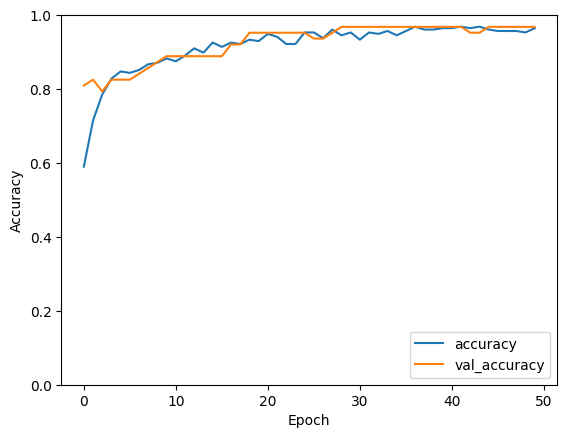

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold
import numpy as np

# Veriyi eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.3, random_state=42)

# Özellikleri standardize etme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Etiketleri ikili kodlamaya dönüştür
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# K-Fold Cross Validation
kf = KFold(n_splits=5)
acc_per_fold = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

    # Modeli oluştur
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    # Modeli derle
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Modeli eğit
    history = model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, validation_data=(X_val_fold, y_val_fold))

    # Fold doğruluğunu kaydet
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    acc_per_fold.append(scores[1])

# Ortalama ve standart sapmayı hesapla
mean_acc = np.mean(acc_per_fold)
std_acc = np.std(acc_per_fold)
print(f'Mean accuracy: {mean_acc * 100:.2f}%')
print(f'Standard deviation: {std_acc * 100:.2f}%')

# Eğitim sürecinin grafiğini çizme
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


# Etiket sayısı

In [ ]:
print(labels_df.value_counts())

iyi     228
kötü    228
Name: count, dtype: int64


# Skorlar

In [ ]:
# Logistic Regression
log_reg_model.fit(X_train, y_train)
log_reg_score = log_reg_model.score(X_test, y_test)
print("Logistic Regression Score:", log_reg_score)

# K-Nearest Neighbors (KNN)
knn_model.fit(X_train, y_train)
knn_score = knn_model.score(X_test, y_test)
print("K-Nearest Neighbors Score:", knn_score)

# Support Vector Machine (SVM)
svm_model.fit(X_train, y_train)
svm_score = svm_model.score(X_test, y_test)
print("Support Vector Machine Score:", svm_score)

# Decision Tree
dt_model.fit(X_train, y_train)
dt_score = dt_model.score(X_test, y_test)
print("Decision Tree Score:", dt_score)

# Random Forest
rf_model.fit(X_train, y_train)
rf_score = rf_model.score(X_test, y_test)
print("Random Forest Score:", rf_score)

# Gradient Boosting
gb_model.fit(X_train, y_train)
gb_score = gb_model.score(X_test, y_test)
print("Gradient Boosting Score:", gb_score)

# Yapay Sinir Ağı
ann_score = model.evaluate(X_test, y_test_encoded)[1]
print("Artificial Neural Network Score:", ann_score)



Logistic Regression Score: 0.948905109489051
K-Nearest Neighbors Score: 0.8394160583941606
Support Vector Machine Score: 0.948905109489051
Decision Tree Score: 0.948905109489051
Random Forest Score: 0.948905109489051
Gradient Boosting Score: 0.9416058394160584
5/5 [==============================] - 0s 4ms/step - loss: 0.2613 - accuracy: 0.9124
Artificial Neural Network Score: 0.9124087691307068


In [ ]:
print("features_df boyutları:", features_df.shape)
print("labels_df uzunluğu:", len(labels_df))


features_df boyutları: (456, 11)
labels_df uzunluğu: 456


# Random Forest için Tahmin

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

# Örnek CV dosyasının yolu
cv_path = '/content/drive/My Drive/resumes/Fancy-Felix-Resume.docx'

# Veriyi eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.3, random_state=42)

# Random Forest Modeli ve Hiperparametre Ayarlaması
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=10)
grid_search_rf.fit(X_train, y_train)
rf_model = grid_search_rf.best_estimator_

# Çapraz doğrulama skorları
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=10)
print("Random Forest (RF) Çapraz Doğrulama Skorları:", cv_scores_rf)
print("Random Forest (RF) Ortalama Çapraz Doğrulama Skoru:", cv_scores_rf.mean())

# Tahmin yapma
rf_predictions = rf_model.predict(X_test)

# Model performansını değerlendirme
print("Random Forest (RF) Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest (RF) Classification Report:\n", classification_report(y_test, rf_predictions))

# Eğitim veri çerçevesinin sütun isimlerini al
feature_names = features_df.columns.tolist()

# Özellikleri ölçeklendirme ve özellik seçimi (aynı scaler ve selector kullanarak)
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Özellik seçimi uygulama (bu adımı ekleyin eğer feature selection yapıyorsanız)
sfm = SelectFromModel(rf_model, prefit=True)
X_train_selected = sfm.transform(X_train_scaled)
X_test_selected = sfm.transform(X_test_scaled)

# RandomForestClassifier modelini yeniden eğitme (eğer özellik seçimi yaptıysanız)
rf_model.fit(X_train_selected, y_train)

# CV özelliklerini çıkar ve tahmin yap
cv_features_dict = extract_features(cv_path)

# Özellikleri modelin beklentisine uygun hale getirme
cv_features_df = pd.DataFrame([cv_features_dict], columns=feature_names)

# Eksik sütunları sıfırlarla doldurma
for column in feature_names:
    if column not in cv_features_df:
        cv_features_df[column] = 0

# Sütunları sıralama
cv_features_df = cv_features_df[feature_names]

# Özellikleri ölçeklendirme
cv_features_scaled = scaler.transform(cv_features_df)

# Özellik seçimi uygulama (eğer eğitimde yaptıysanız burada da yapmalısınız)
cv_features_selected = sfm.transform(cv_features_scaled)

# Tahmin yapma
cv_prediction = rf_model.predict(cv_features_selected)[0]

# Tahmin sonucunu yazdır
print("Tahmin Edilen CV Etiketi:", cv_prediction)


Random Forest (RF) Çapraz Doğrulama Skorları: [0.90625 1.      0.9375  0.96875 0.96875 1.      1.      0.96875 0.9375
 1.     ]
Random Forest (RF) Ortalama Çapraz Doğrulama Skoru: 0.96875
Random Forest (RF) Accuracy: 0.9562043795620438
Random Forest (RF) Classification Report:
               precision    recall  f1-score   support

         iyi       0.92      1.00      0.96        73
        kötü       1.00      0.91      0.95        64

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.96       137
weighted avg       0.96      0.96      0.96       137



ValueError: X has a different shape than during fitting.

# SVM için Tahmin

In [ ]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np
from sklearn.preprocessing import StandardScaler

# Örnek CV dosyasının yolu
cv_path = '/content/drive/My Drive/resumes/Ruhsatlandırma müdürü özgeçmişi.docx'

# Eğitim veri çerçevesinin sütun isimlerini al
feature_names = features_df.columns.tolist()

# SVM modelini oluştur
svm_model = SVC()
svm_model.fit(X_train_selected, y_train)

# Özellikleri çıkar ve tahmin yap
cv_features_dict = extract_features(cv_path)

# Özellikleri modelin beklentisine uygun hale getirme
cv_features_df = pd.DataFrame([cv_features_dict], columns=feature_names)

# Eksik sütunları sıfırlarla doldurma
for column in feature_names:
    if column not in cv_features_df:
        cv_features_df[column] = 0

# Sütunları sıralama
cv_features_df = cv_features_df[feature_names]

# Özellikleri ölçeklendirme
cv_features_scaled = scaler.transform(cv_features_df)

# Özellik seçimi uygulama
cv_features_selected = sfm.transform(cv_features_scaled)

# Tahmin yapma
cv_prediction = svm_model.predict(cv_features_selected)[0]

# Tahmin sonucunu yazdır
print("Tahmin Edilen CV Etiketi:", cv_prediction)


# Logistic Regression için Tahmin

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.preprocessing import StandardScaler

# Örnek CV dosyasının yolu
cv_path = '/content/drive/My Drive/resumes/Ruhsatlandırma müdürü özgeçmişi.docx'

# Eğitim veri çerçevesinin sütun isimlerini al
feature_names = features_df.columns.tolist()

# Logistic Regression modelini oluştur
lr_model = LogisticRegression()
lr_model.fit(X_train_selected, y_train)

# Özellikleri çıkar ve tahmin yap
cv_features_dict = extract_features(cv_path)

# Özellikleri modelin beklentisine uygun hale getirme
cv_features_df = pd.DataFrame([cv_features_dict], columns=feature_names)

# Eksik sütunları sıfırlarla doldurma
for column in feature_names:
    if column not in cv_features_df:
        cv_features_df[column] = 0

# Sütunları sıralama
cv_features_df = cv_features_df[feature_names]

# Özellikleri ölçeklendirme
cv_features_scaled = scaler.transform(cv_features_df)

# Özellik seçimi uygulama
cv_features_selected = sfm.transform(cv_features_scaled)

# Tahmin yapma
cv_prediction = lr_model.predict(cv_features_selected)[0]

# Tahmin sonucunu yazdır
print("Tahmin Edilen CV Etiketi:", cv_prediction)


# KNN (K-Nearest Neighbors) için Tahmin

In [ ]:
# Örnek CV dosyasının yolu
cv_path = '/content/drive/My Drive/resumes/meltemdanışmazcven.docx'

# Eğitim veri çerçevesinin sütun isimlerini belirle
feature_names = features_df.columns.tolist()

# KNN modelini oluştur
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Özellikleri çıkar ve tahmin yap
cv_features = extract_features(cv_path)
cv_features_df = pd.DataFrame([cv_features], columns=feature_names)
knn_prediction = knn_model.predict(cv_features_df)

# Tahmin sonucunu yazdır
print("Tahmin Edilen CV Etiketi:", knn_prediction)


# Decision Tree için Tahmin

In [ ]:
# Örnek CV dosyasının yolu
cv_path = '/content/drive/My Drive/resumes/Ruhsatlandırma müdürü özgeçmişi.docx'

# Eğitim veri çerçevesinin sütun isimlerini belirle
feature_names = features_df.columns.tolist()

# Decision Tree modelini oluştur
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Özellikleri çıkar ve tahmin yap
cv_features = extract_features(cv_path)
cv_features_df = pd.DataFrame([cv_features], columns=feature_names)
dt_prediction = dt_model.predict(cv_features_df)

# Tahmin sonucunu yazdır
print("Tahmin Edilen CV Etiketi:", dt_prediction)


# Gradient Boosting için Tahmin

In [ ]:
# Örnek CV dosyasının yolu
cv_path = '/content/drive/My Drive/resumes/Ruhsatlandırma müdürü özgeçmişi.docx'

# Eğitim veri çerçevesinin sütun isimlerini belirle
feature_names = features_df.columns.tolist()

# Gradient Boosting modelini oluştur
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Özellikleri çıkar ve tahmin yap
cv_features = extract_features(cv_path)
cv_features_df = pd.DataFrame([cv_features], columns=feature_names)
gb_prediction = gb_model.predict(cv_features_df)

# Tahmin sonucunu yazdır
print("Tahmin Edilen CV Etiketi:", gb_prediction)


# Yapay Sinir Ağı Test

In [ ]:
# Modeli yükleme
from tensorflow.keras.models import load_model

# Modelin yolunu belirtin
model_path = '/content/drive/My Drive/models/my_model.h5'

# Modeli yükleme
model = load_model(model_path)

# Meltem Danışmaz'ın CV'sinin dosya yolu
cv_path = '/content/drive/My Drive/resumes/Neha Mugghala(1).docx'

# CV'den özelliklerin çıkarılması
cv_features = extract_features(cv_path)

# Özellikleri modelin beklentisine uygun hale getirme
cv_features_array = np.array([list(cv_features.values())])

# Özellikleri ölçeklendirme
cv_features_scaled = scaler.transform(cv_features_array)

# Tahmin yapma
cv_prediction = model.predict(cv_features_scaled)[0][0]

# Tahminin eşiğe göre sınıflandırılması
cv_label = "iyi" if cv_prediction <= 0.5 else "kötü"

# Tahmini yazdırma
print(f"CV tahmini: {cv_prediction} ({cv_label} CV)")


In [ ]:
print(cv_features_array.shape)

